# Assignment 4: PCA/Eigenbehaviors

### Import packages

In [1]:
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio
import pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
import scipy as sp
from sklearn.cluster import KMeans

## Part I: Eigenbehaviors

### Import data

In [4]:
# Read matlab file
print("Loading in matlab data - this takes ~1min and about 2gb memory")
matlab_obj = sio.loadmat('reality_mining/realitymining.mat')
print("Done loading matlab data.")
print('Extracting valid subjects and creating id dictionaries.')

Loading in matlab data - this takes ~1min and about 2gb memory
Done loading matlab data.
Extracting valid subjects and creating id dictionaries.


In [5]:
# Load matlab_obj as a dictionary
s = matlab_obj['s']

In [6]:
# Use pickle to save the object and avoid excess time processing
print("Writting realitymining ~1min...")
filename = 'realitymining'
outfile = open(filename,'wb')
pickle.dump(s,outfile)
print("Done")
outfile.close()

Writting realitymining ~1min...
Done


In [7]:
# Upload python object
filename = 'realitymining'
print("Loading realitymining ~1min...")
infile = open(filename,'rb')
print("Done")

Loading realitymining ~1min...
Done


In [8]:
# Upload subject data
print("Filling s structure ~1min...")
s = pickle.load(infile) 
print("Done")
infile.close()

Filling s structure ~1min...
Done


In [9]:
# Subject 4
subjectID = 4
M = s['data_mat'][0, subjectID-1].transpose()

<ipython-input-10-194065cbcea9>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.set_title('Data matrix', FontSize = 15)


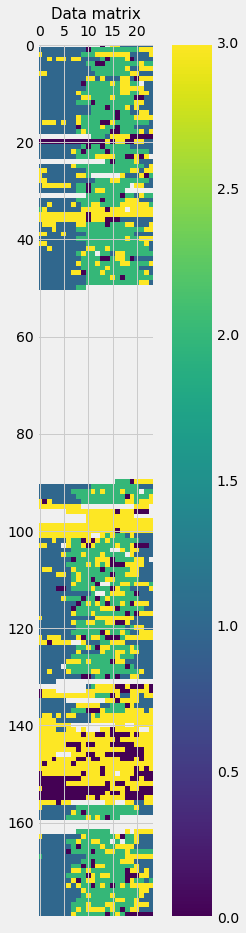

In [10]:
# Subject 4 data matrix
fig = plt.figure(figsize=(5,15))
axes = fig.add_subplot(111)
mat = axes.matshow(M)
fig.colorbar(mat)
axes.set_title('Data matrix', FontSize = 15)
plt.show()

### Binary Matrix

In [11]:
# Generate binary matrix
days = np.size(M,0)
hours = np.size(M,1)
num_labels = 5
Mbw = np.zeros([days, hours * num_labels])

In [12]:
# Create column names based on behavior
name_column = []

for j in range(1, np.size(Mbw,1)+1):
    J1 = hours * (num_labels-1) + 1
    if j >= J1:      
        name_column.append(str(j-J1) + '_off')
    else:
        J2 = hours * (num_labels - 2) + 1
        if j >= J2:
            name_column.append(str(j-J2) + '_nsf')
        else:
            J3 = hours * (num_labels - 3) + 1
            if j >= J3:
                name_column.append(str(j-J3) + '_els')
            else:
                J4 = hours * (num_labels-4) + 1
                if j >= J4:
                    name_column.append(str(j-J4) + '_wrk')
                else:
                    name_column.append(str(j-1) + '_hom')

In [14]:
# Generate covariance matrix
for i in range(1, days+1):
    for j in range(1, hours+1):
        place = M[i-1][j-1]
        if np.isnan(place):
            Ji = hours * (num_labels-1) + 1
            J = Ji + j - 1
            Mbw[i-1][J-1] = 1
        else:
            if place==0:
                Ji = hours * (num_labels-2) + 1
                J = Ji + j - 1
                Mbw[i-1][J-1] = 1
            else:
                Ji = int(hours * (place-1) + 1)
                J = int(Ji + j - 1)
                Mbw[i-1][J-1] = 1

<ipython-input-15-dc3567951287>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_title('Binary matrix', FontSize = 15)


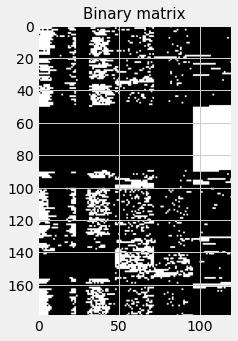

In [15]:
# Subject 4 binary matrix
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)
ax1.set_title('Binary matrix', FontSize = 15)
ax1.imshow(Mbw, cmap = cm.Greys_r)

In [16]:
# Covariance dataframe
df = pd.DataFrame(data = Mbw, index = None, columns = name_column)

In [17]:
df.describe(percentiles=[]).T.sort_values(['mean'], ascending = False).drop(['count','min','max'], axis=1).T

,4_hom,3_hom,5_hom,2_hom,1_hom,0_hom,6_hom,16_wrk,12_wrk,13_wrk,...,14_hom,0_wrk,15_hom,13_hom,16_hom,2_wrk,1_wrk,3_wrk,4_wrk,5_wrk
mean,0.533333,0.527778,0.511111,0.500000,0.488889,0.477778,0.472222,0.405556,0.405556,0.394444,...,0.016667,0.011111,0.011111,0.005556,0.005556,0.0,0.0,0.0,0.0,0.0
std,0.500279,0.500620,0.501271,0.501395,0.501271,0.500899,0.500620,0.492369,0.492369,0.490094,...,0.128376,0.105114,0.105114,0.074536,0.074536,0.0,0.0,0.0,0.0,0.0
50%,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
df.head()

,0_hom,1_hom,2_hom,3_hom,4_hom,5_hom,6_hom,7_hom,8_hom,9_hom,...,14_off,15_off,16_off,17_off,18_off,19_off,20_off,21_off,22_off,23_off
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA Components

In [19]:
# Perform PCA
n_components = len(name_column)
pca = PCA(n_components = len(name_column))
pca.fit(df)

PCA(n_components=120)

In [20]:
# PCA Components (Eigenvectors)
PC_dictionnary = {}
Principal_components_names = ['PC ' + str(i) for i in range(1, len(name_column) + 1)]
for idx in range(len(Principal_components_names)):
    PC_dictionnary[Principal_components_names[idx]] = pca.components_[idx]
PC_data = pd.DataFrame(data = PC_dictionnary) 

In [21]:
PC_np = PC_data.to_numpy()
name_state = ['hom','wrk','els','nsa','off']

<ipython-input-22-b5bb3f530179>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels(name_state, FontSize = 15)
<ipython-input-22-b5bb3f530179>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels(name_state, FontSize = 15)
<ipython-input-22-b5bb3f530179>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax3.set_xticklabels(name_state, FontSize = 15)


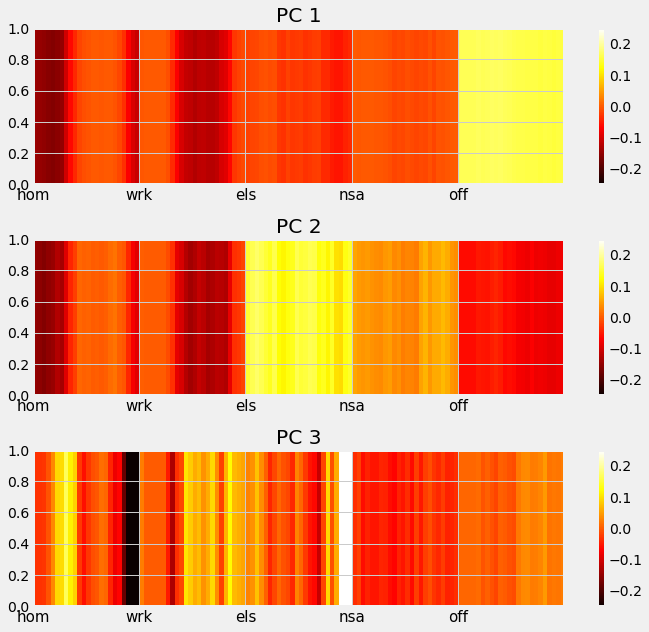

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,9))

im = ax1.imshow(np.transpose(PC_np[:,0:1]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax1.set_title('PC 1')
fig.colorbar(im, ax=ax1)
ax1.set_xticks(np.arange(0,120,24))
ax1.set_xticklabels(name_state, FontSize = 15)

im2 = ax2.imshow(np.transpose(PC_np[:,1:2]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax2.set_title('PC 2')
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0,120,24))
ax2.set_xticklabels(name_state, FontSize = 15)

im3 = ax3.imshow(np.transpose(PC_np[:,2:3]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto',cmap=cm.hot)
ax3.set_title('PC 3')
fig.colorbar(im3, ax=ax3)
ax3.set_xticks(np.arange(0,120,24))
ax3.set_xticklabels(name_state, FontSize = 15)

plt.tight_layout()
plt.show()

In [23]:
PC_data['Variables'] = name_column
PC_data = PC_data.set_index(PC_data['Variables'])
PC_data['sort'] = PC_data['PC 1'].abs()
PC_data = PC_data.sort_values(['sort'], ascending = False).drop('sort', axis=1)

### 1. How do the first 3 eigenvectors for the chosen subject relate to the behaviors seen in days 10, 15 and 20 of this subject? Do the projections to answer this question.

<b> Day 10 </b>

In [24]:
pca_3 = PCA(n_components = 3)
pca_3.fit(df)
pca_3.fit_transform(df.iloc[[9, 14, 19]])[0]

array([-1.78138594e+00,  1.92757698e+00,  7.84239628e-16])

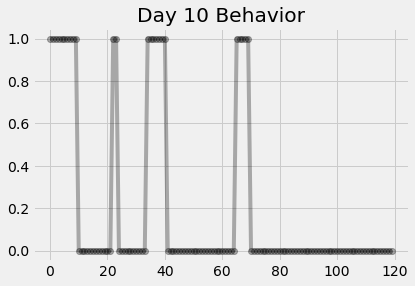

In [25]:
x = np.arange(hours * num_labels)
plt.plot(x, Mbw[9,:], 'o-', color='black', alpha=0.3)
plt.title("Day 10 Behavior");

<b> Day 15 </b>

In [26]:
pca_3.fit_transform(df.iloc[[9, 14, 19]])[1]

array([-2.24378579e+00, -1.78539843e+00,  7.84239628e-16])

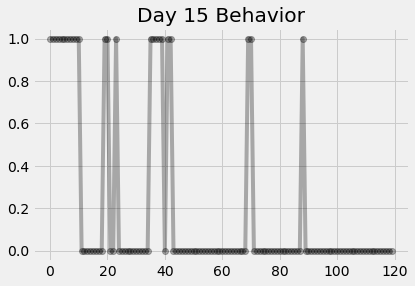

In [27]:
plt.plot(x, Mbw[14,:], 'o-', color='black', alpha=0.3)
plt.title("Day 15 Behavior");

<b> Day 20 </b>

In [28]:
pca_3.fit_transform(df.iloc[[9, 14, 19]])[2]

array([ 4.02517173e+00, -1.42178552e-01,  7.84239628e-16])

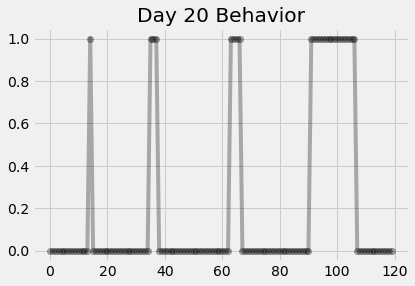

In [29]:
plt.plot(x, Mbw[19,:], 'o-', color='black', alpha=0.3)
plt.title("Day 20 Behavior");

### 2. Draw the reconstruction of these three sample days with the first three eigenvectors.

In [30]:
recon = pca_3.inverse_transform(pca_3.fit_transform(df))

<b> Day 10 </b>

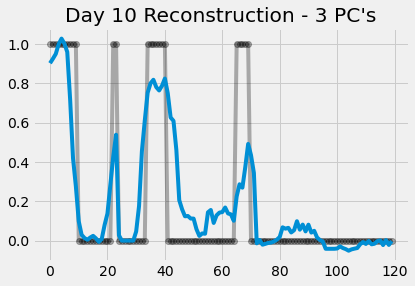

In [31]:
recon_10 = recon[9]
plt.plot(x, Mbw[9], 'o-', color='black', alpha=0.3)
plt.plot(x, recon_10)
plt.title("Day 10 Reconstruction - 3 PC's");

<b> Day 15 </b>

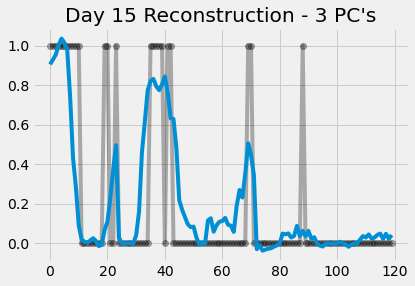

In [32]:
recon_15 = recon[14]
plt.plot(x, Mbw[14], 'o-', color='black', alpha=0.3)
plt.plot(x, recon_15)
plt.title("Day 15 Reconstruction - 3 PC's");

<b> Day 20 </b>

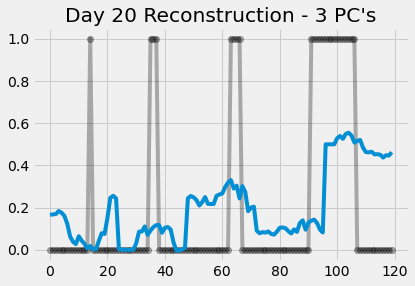

In [33]:
recon_20 = recon[19]
plt.plot(x, Mbw[19], 'o-', color='black', alpha=0.3)
plt.plot(x, recon_20)
plt.title("Day 20 Reconstruction - 3 PC's");

### 3. What percentage of the variance of the entire data the first 3 eigenvectors account for? How many eigenvectors do you need to reconstruct each of the 3 sample days with more than 75% accuracy?

In [34]:
var_3PCS = sum(pca_3.explained_variance_ratio_)
print("Variance Accounted for by first 3 Eigenvectors: ", np.round(var_3PCS * 100, 1), "%")

Variance Accounted for by first 3 Eigenvectors:  53.8 %


In [35]:
def accuracy(data, recon_data, day):
    original = sum(data[day-1])
    predicted = sum(abs(data[day-1] - recon_data[day-1]))
    return abs(original - predicted)/original

In [36]:
pca_75 = PCA(n_components = 55)
pca_75.fit(df)
recon_75 = pca_75.inverse_transform(pca_75.fit_transform(df))

In [37]:
# > 75 % Accuracy: 49
print("Accuracy Day 10: ", accuracy(Mbw, recon_75, 10))

Accuracy Day 10:  0.8446497163424258


In [38]:
# > 75 % Accuracy: 41
print("Accuracy Day 15: ", accuracy(Mbw, recon_75, 15))

Accuracy Day 15:  0.814775049308032


In [39]:
# > 75 % Accuracy: 41
print("Accuracy Day 20: ", accuracy(Mbw, recon_75, 20))

Accuracy Day 20:  0.7600226872472823


### 4. Can you identify a day that is the worst reconstructed by the first 3 eigenbehaviors?

In [40]:
worst_day = [1, accuracy(Mbw, recon, 1)]
for i in range(2, days):
    acc = accuracy(Mbw, recon, i)
    if acc < worst_day[1]:
        worst_day = [i, acc]

In [41]:
print("Worst reconstructed day is day ", worst_day[0], "with accuracy ", round(worst_day[1] * 100, 2), "%")

Worst reconstructed day is day  91 with accuracy  0.34 %


### 5. Plot the first and second principle components for PCA's with 2 and 5 components, coloring the scatter plots according to the Euclidean distance to the mean. What is the difference between the distances in the two plots?

In [42]:
def scatter_euclidean(num_components):
    # Initialize PCA
    pca = PCA(n_components = num_components)
    pca.fit(df)
    Mbw_score = pca.transform(Mbw)
    
    # Calculate Euclidean distance
    euclidean = np.zeros(Mbw.shape[0])
    for i in range(num_components):
        euclidean += (Mbw_score[:, i] - np.mean(Mbw_score))**2 / np.var(Mbw_score)
    
    # Scatter plot   
    colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
    fig = plt.figure(figsize=(8,6))
    norm = mpl.colors.Normalize(vmin=min(euclidean),vmax=max(euclidean))
    cmap = mpl.cm.jet
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap))

    with plt.style.context(('ggplot')):
        cm = colors
        plt.scatter(Mbw_score[:, 0], Mbw_score[:, 1], c=colors, edgecolors='k', s=60)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Score Plot')
    plt.show()

Number of components = 2

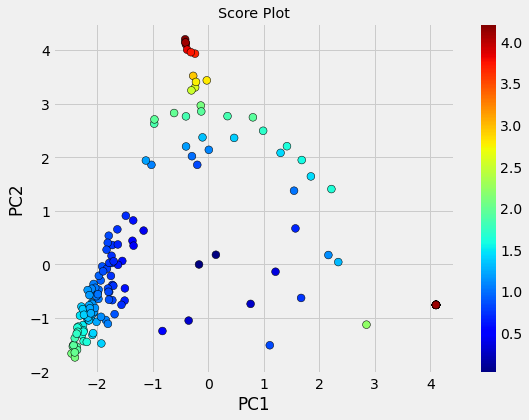

In [43]:
scatter_euclidean(2)

Number of components = 5

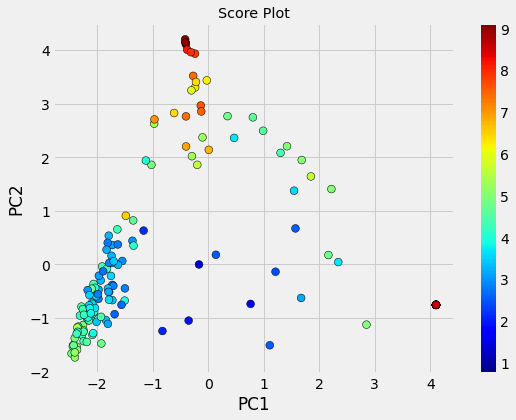

In [44]:
scatter_euclidean(5)

### 6. Plot the square distance vs. numbers of clusters K for PCA's with 2 and 5 components.

In [45]:
def cluster_sq_dist(num_components):
    # Initialize PCA
    pca = PCA(n_components = num_components)
    proj_data = pca.fit_transform(df)
    
    # Calculate sum of squared distances
    ssd = []
    K = range(1, 10)
    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(proj_data)
        ssd.append(km.inertia_)
        
    # Squared distance plot
    plt.figure(figsize = (10,6))
    ax = plt.gca()
    plt.plot(K, ssd, linewidth = 2)
    plt.plot(K, ssd, '.', c='r',markersize = 6)
    plt.plot(K,[ssd[-1] for i in range(len(ssd))],'--', linewidth = 1.5, c = 'black')

    plt.xlabel('Number of clusters', fontsize = 12)
    plt.ylabel('Sum of squared distances', fontsize = 12)
    plt.title('Variation of the sum of squared distances as a function of number of clusters', fontsize = 15, y = 1.05)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.grid(True)
    plt.show()

Number of components = 2

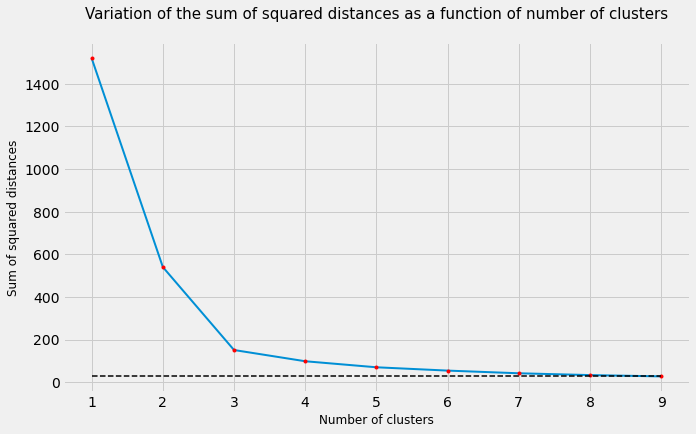

In [46]:
cluster_sq_dist(2)

Number of components = 5

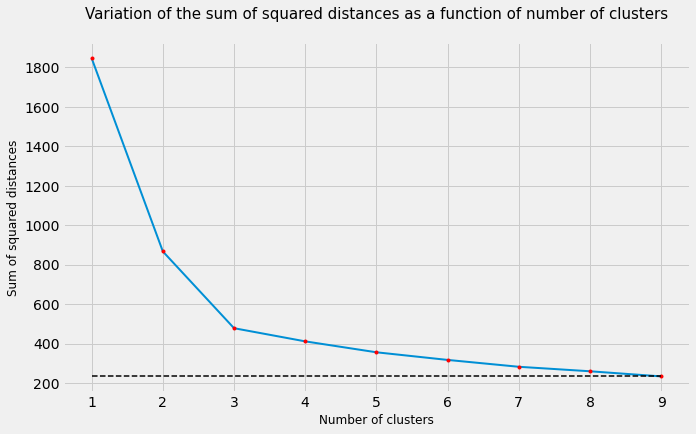

In [47]:
cluster_sq_dist(5)

### 7. Plot the average day of the members of each cluster, aka K plots of mean(Mbw) vs. time. Choose number of components for PCA (2) and number of clusters (3) based on square distance.

In [98]:
def avg_day_cluster(num_components, num_clusters):
    # Initialize PCA
    pca = PCA(n_components = num_components)
    proj_data = pca.fit_transform(df)
    
    # Intialize clustering
    km = KMeans(n_clusters = num_clusters)
    membership = km.fit_predict(proj_data)
    
    # Cluster Mbw
    time = np.arange(hours * num_labels)
    colors = ['c', 'm', 'g']
    for i in range(1, num_clusters + 1):
        cluster = np.mean(Mbw[np.where(membership == i - 1)], axis = 0)
    
        # Plot avg day of members for each cluster
        plt.plot(time, cluster, '-', color = colors[i - 1], alpha=0.3)
        plt.title("Average Day for Cluster {}".format(i))
        plt.show()

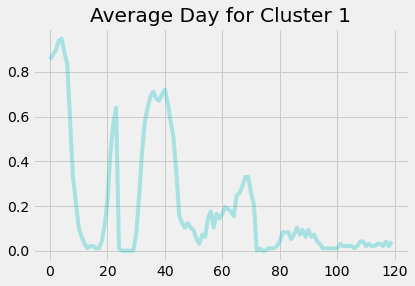

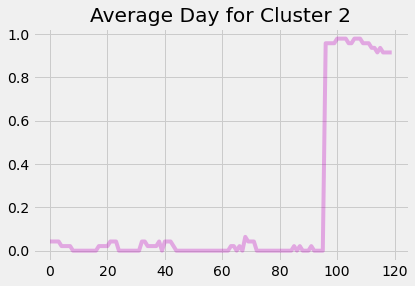

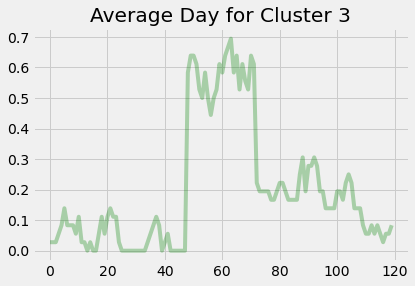

In [99]:
avg_day_cluster(2, 3)

## Part II: Clustering Electric Consumption

### 1. How many accounts are given? What are the dimensions of the data?

In [202]:
edf = pd.read_csv('TypicalWeekdayProfile.txt', sep = "\t", header = None)
edf

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.0271,0.0222,0.0214,0.0144,0.0131,0.0158,0.0156,0.0137,0.0134,0.0113,...,0.0325,0.0456,0.0468,0.0377,0.0427,0.0456,0.0328,0.0316,0.0349,0.0337
1,0.2108,0.2115,0.2108,0.2104,0.2079,0.2081,0.2058,0.2049,0.2050,0.2028,...,0.2069,0.2043,0.2109,0.2143,0.2143,0.2092,0.2102,0.2081,0.2066,0.2050
2,0.0446,0.0458,0.0452,0.0453,0.0438,0.0439,0.0440,0.0451,0.0445,0.0450,...,0.0454,0.0462,0.0457,0.0453,0.0447,0.0452,0.0443,0.0443,0.0449,0.0462
3,0.1083,0.0708,0.0829,0.0594,0.0628,0.0773,0.0679,0.0880,0.0748,0.0410,...,0.1263,0.1478,0.1440,0.1486,0.1537,0.1412,0.1429,0.1041,0.1336,0.1154
4,0.0005,0.0003,0.0003,0.0004,0.0004,0.0002,0.0005,0.0002,0.0003,0.0004,...,0.0003,0.0002,0.0002,0.0004,0.0002,0.0004,0.0004,0.0002,0.0004,0.0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,0.0245,0.0243,0.0295,0.0211,0.0194,0.0188,0.0175,0.0182,0.0175,0.0187,...,0.0386,0.0333,0.0270,0.0300,0.0374,0.0301,0.0322,0.0408,0.0336,0.0339
1251,0.0045,0.0042,0.0037,0.0047,0.0042,0.0034,0.0049,0.0040,0.0038,0.0049,...,0.0037,0.0037,0.0044,0.0034,0.0040,0.0043,0.0032,0.0047,0.0035,0.0037
1252,0.0965,0.1050,0.0945,0.0934,0.0890,0.0825,0.0809,0.0735,0.0604,0.0560,...,0.0900,0.0930,0.0900,0.1095,0.1147,0.1188,0.1080,0.1179,0.1169,0.0975
1253,0.0048,0.0050,0.0049,0.0048,0.0050,0.0048,0.0049,0.0050,0.0049,0.0049,...,0.0047,0.0046,0.0048,0.0046,0.0048,0.0048,0.0047,0.0048,0.0049,0.0048


### 2. Plot the first 6 eigenvectors for the data and convert the x-axis to a range from 1 to 24 hrs.

In [122]:
pca_6 = PCA(n_components = 6)
pca_6.fit(edf)

PCA(n_components=6)

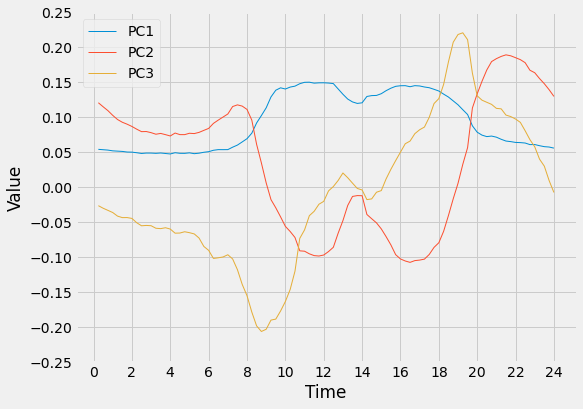

In [123]:
time = list(((edf.columns + 1) * 15) / 60)
plt.figure(figsize = (8,6))
plt.plot(time, pca_6.components_[0], linewidth = 1, label = "PC1")
plt.plot(time, pca_6.components_[1], linewidth = 1, label = "PC2")
plt.plot(time, pca_6.components_[2], linewidth = 1, label = "PC3")
plt.xticks(np.arange(0, 25, 2))
plt.yticks(np.arange(-0.25, 0.3, 0.05))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend();

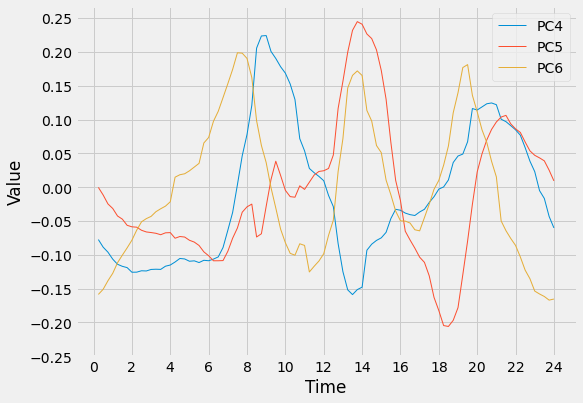

In [124]:
time = list(((edf.columns + 1) * 15) / 60)
plt.figure(figsize = (8,6))
plt.plot(time, pca_6.components_[3] * -1, linewidth = 1, label = "PC4")
plt.plot(time, pca_6.components_[4] * -1, linewidth = 1, label = "PC5")
plt.plot(time, pca_6.components_[5], linewidth = 1, label = "PC6")
plt.xticks(np.arange(0, 25, 2))
plt.yticks(np.arange(-0.25, 0.3, 0.05))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend();

### 3. How many K eigenvectors are needed to explain at least 92% of the variance?

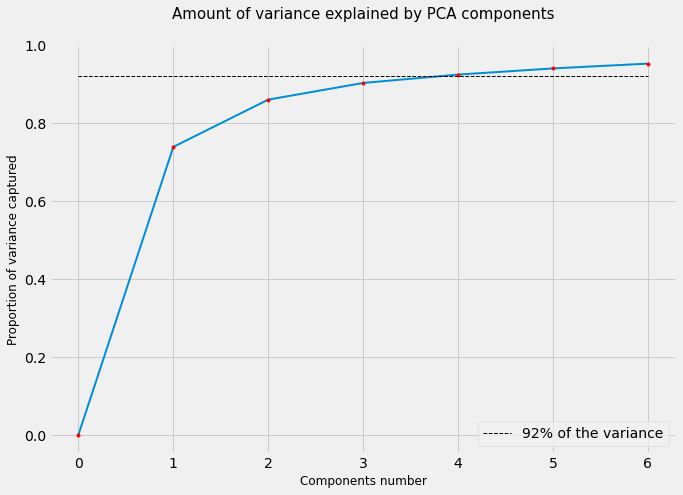

In [125]:
list_variance = pca_6.explained_variance_ratio_

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, 6+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, 6+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, 6+1),[0.92 for i in range(0, 6+1)],'--',c = 'black',
         linewidth = 1,label="92% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 12)
plt.ylabel('Proportion of variance captured',fontsize = 12)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(0, 22, step=1))
ax.grid(True)
plt.show()

In [126]:
print("4 Eigenvectors explain ", round(sum(list_variance[0:4]) * 100, 2), "% of the variance")

4 Eigenvectors explain  92.43 % of the variance


### 4. Apply Kmeans with K equal to the previous answer and plot the scores of PC1 vs. PC2, coloring each cluster differently.

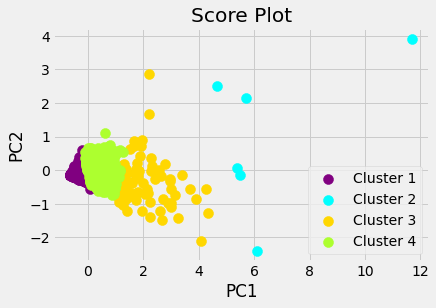

In [267]:
proj_data = pca_6.transform(edf)
km = KMeans(n_clusters = 4)
y_km = km.fit_predict(proj_data)
plt.scatter(proj_data[y_km ==0,0], proj_data[y_km == 0,1], c = "purple", s = 100, label = "Cluster 1") 
plt.scatter(proj_data[y_km ==1,0], proj_data[y_km == 1,1], c = "cyan", s = 100, label = "Cluster 2")
plt.scatter(proj_data[y_km ==2,0], proj_data[y_km == 2,1], c = "gold", s = 100, label = "Cluster 3")
plt.scatter(proj_data[y_km ==3,0], proj_data[y_km == 3,1], c = "greenyellow", s = 100, label = "Cluster 4")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Score Plot")
plt.legend();

### 5. Plot the data of the original accounts separated in K (4) subplots. What can you learn from the accounts that belong to each of the K clusters?

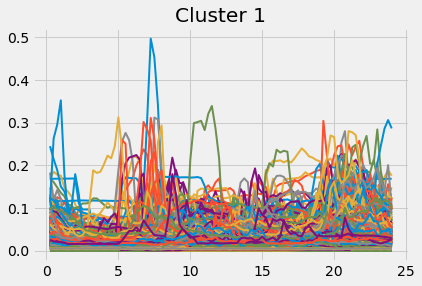

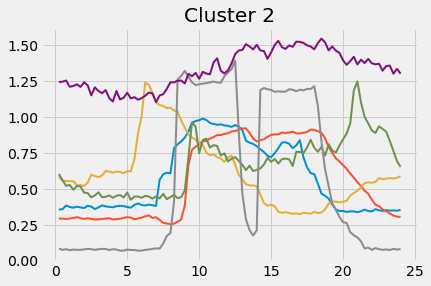

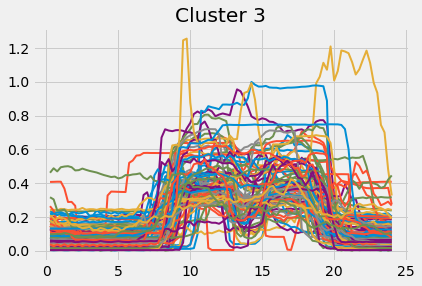

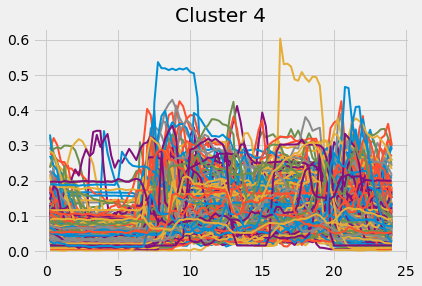

In [268]:
edf["cluster"] = y_km
for i in np.unique(y_km):
    data = edf[edf["cluster"] == i].drop(columns = ["cluster"])
    data.columns = np.arange(0.25, 24.25, 0.25)
    data.T.plot(legend = False, lw = 2)
    plt.title("Cluster {}".format(i + 1))
edf.drop(columns = ["cluster"], inplace = True)